# Assignment 4: Association Rules
### Problem Statement 4: 
A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.

### **Business Objectives:**
- **Understand Customer Preferences:** Analyze the sales data of previous phone models based on the colors preferred by customers in different regions. The goal is to identify color preferences for specific regions to optimize the marketing of new models.

- **Optimize Marketing Strategy:** Use association rule mining to discover patterns in customer choices, such as which colors tend to sell better together or in certain regions. This can help in designing region-specific marketing campaigns, highlighting popular color combinations or preferences.

- **Increase Sales for New Models:** By identifying customer color preferences and applying these insights to the new phone launch, the company aims to improve the likelihood of higher sales by offering models in popular colors or color combinations.

- **Product Customization:** The insights can help the company decide which color variations of the new phones to produce in larger quantities for specific regions, optimizing inventory and manufacturing.

### **Constraints:**
- **Limited Feature Set:** Since the dataset only contains the colors of the mobile phones, the insights might be limited to preferences related to colors, without considering other potential factors like phone specifications, pricing, or promotions.

- **Region-Specific Differences:** The association rules must account for regional differences in customer preferences. A color popular in one region might not perform well in another, making it essential to generate region-specific rules.

- **Data Quality and Coverage:** The accuracy of the analysis depends on how well the dataset covers all relevant regions and past models. Incomplete or biased data may lead to inaccurate insights.

In [1]:
import pandas as pd
df=pd.read_csv('myphonedata.csv')
df.head()

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


In [2]:
#already encoded in format suitable for apriori
#apply apriori algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.545455,(blue)
3,0.363636,"(white, red)"
4,0.363636,"(blue, red)"
5,0.363636,"(white, blue)"


In [3]:
#association rules
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606,0.125
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909,0.100
2,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636,0.400
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636,0.400
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606,0.125
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909,0.100


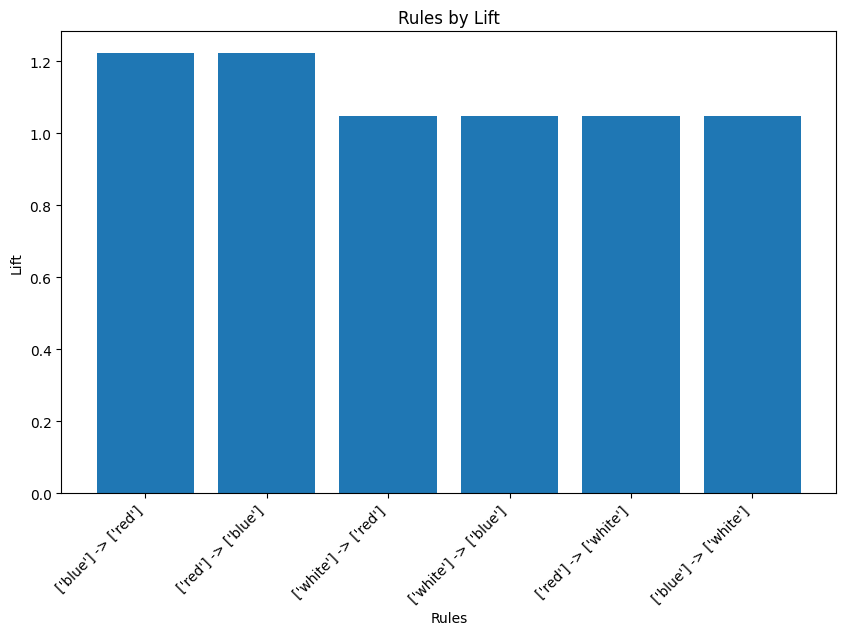

In [8]:
#Sort rules by lift in descending order
rules_sorted_by_lift = rules.sort_values('lift', ascending=False)
#plot lift for the 5 association rules
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules_sorted_by_lift)), rules_sorted_by_lift['lift'])
plt.xticks(range(len(rules_sorted_by_lift)), rules_sorted_by_lift.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.title('Rules by Lift')
plt.show()

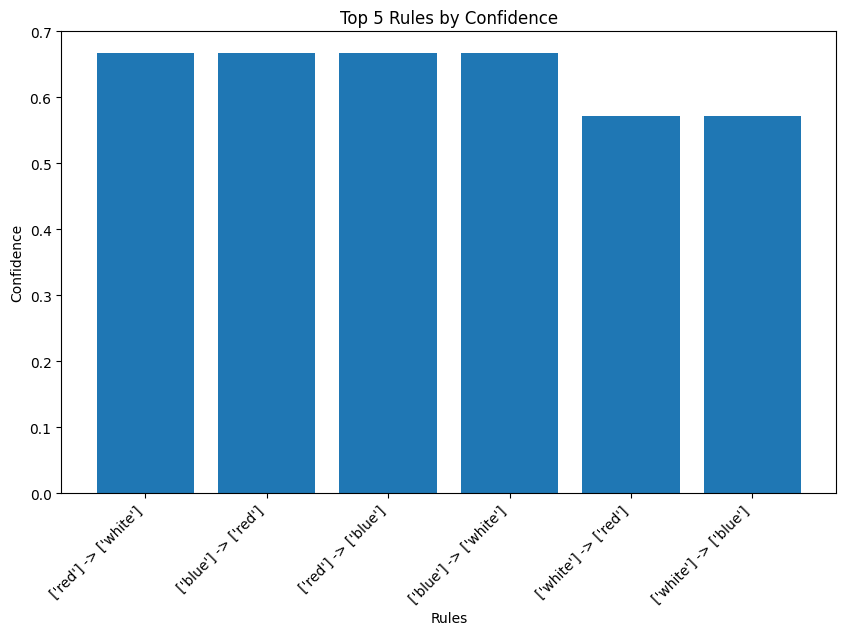

In [9]:
#Sort rules by confidence in descending order
rules_sorted_by_confidence = rules.sort_values('confidence', ascending=False)
#bar chart for confidence
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules_sorted_by_confidence)), rules_sorted_by_confidence['confidence'])
plt.xticks(range(len(rules_sorted_by_confidence)), rules_sorted_by_confidence.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Confidence')
plt.title('Top 5 Rules by Confidence')
plt.show()

In [6]:
!git add "PS 4 (myphonedata).ipynb"
!git commit -m "Added solution for PS 4"
!git push

[main 2f225be] Added solution for PS 4
 1 file changed, 1272 insertions(+)
 create mode 100644 Assignment-4 Association Rules/PS 4 (myphonedata).ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 62.83 KiB | 2.33 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:parth-gz/Data-Science-Assignments
   4486d3c..2f225be  main -> main
